# Creating the frame
The purpose of this notebook is to create the wireframe for the dataset.

In [124]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.abspath('../../building_road_segmentation'))

import building_road_segmentation
import tensorflow as tf
import tensorflow.keras

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps

import glob
import os

import geopandas as gpd
import rasterio
import rasterio.features
from rasterio.merge import merge
from rasterio.plot import show

In [125]:

data_directory = 'D:\Capstone Project\data\\'

In [126]:
#image_names

In [127]:
#directories_dicts

In [154]:
X_paths = glob.glob(data_directory +'final_images\\*')
y_paths = [glob.glob(data_directory +'final_masks\\road_*'), glob.glob(data_directory +'final_masks\\building_*')]

In [155]:
y_paths[0][:2]
y_paths[1][:2]

['D:\\Capstone Project\\data\\final_masks\\building_mask_AOI_2_Vegas_img1.npy',
 'D:\\Capstone Project\\data\\final_masks\\building_mask_AOI_2_Vegas_img10.npy']

In [156]:
for k in range(len(X_paths)):
    n1 = X_paths[k].split("\\")[-1].replace(".npy", '')
    n2 = y_paths[0][k].split("road_mask_")[-1].replace(".npy", '')
    n3 = y_paths[1][k].split("building_mask_")[-1].replace(".npy", '')
    assert n1 == n2
    assert n2 == n3

In [129]:
len(y_paths[1])

19646

In [130]:
len(X_paths)

19646

In [131]:
print(y_paths[0][40])
print(y_paths[1][40])

D:\Capstone Project\data\final_masks\road_mask_AOI_2_Vegas_img1073.npy
D:\Capstone Project\data\final_masks\building_mask_AOI_2_Vegas_img1073.npy


In [132]:
new_size = (128, 128)
from PIL.ImageFilter import (
    GaussianBlur
    )
for k in range(len(X_paths)):
    if not os.path.exists("final_masks_small\\" + X_paths[k].split("\\")[-1].replace(".npy", '') + '.npy'):
        m0 = np.load(y_paths[0][k]).astype(int)
        m1 = np.load(y_paths[1][k]).astype(int)
        rast_img = np.load(X_paths[k])
        array = np.clip(rast_img/np.max(rast_img) * 255, 0, 255).astype(np.uint8)
        fraction_nonnans = (rast_img.size - np.count_nonzero(rast_img))/rast_img.size
        if (np.sum(m0)  < 600):       
            m0 = m0 * 0 - 1

        if (np.all(m0 >= 0) or np.all(m1 >= 0)) and (fraction_nonnans < 0.7):

            img_mask = [np.array(Image.fromarray(m0 * 255).convert('L').filter(GaussianBlur(radius=5)).resize(new_size, Image.BICUBIC)) if (np.sum(m0)  >= 600) else np.ones(new_size) * -255, 
                        np.array(Image.fromarray(m1).convert('L').resize(new_size,Image.BICUBIC))]
            mask = np.moveaxis(img_mask, 0, 2)/255.
            mask[:, :, 0] = np.clip(np.ceil(mask[:, :, 0]), 0, 1) if np.sum(mask[:, :, 0]) > 0 else -1.
            mask[:, :, 1] = np.clip(np.ceil(mask[:, :, 1]), 0, 1)
            np.save("final_masks_small\\" + X_paths[k].split("\\")[-1].replace(".npy", '') + '.npy', mask)
            img = Image.fromarray(array)
            img = PIL.ImageOps.equalize(img)
            img = img.resize(new_size,Image.BICUBIC)
            img.save("final_images_small\\" + X_paths[k].split("\\")[-1].replace(".npy", '') + '.png')
        if k % 1000 == 0:
            print(f'{k}')

0
5000
6000
7000


C:\Users\lukep\AppData\Local\Temp/ipykernel_5668/343146951.py:10: RuntimeWarning: invalid value encountered in true_divide
  array = np.clip(rast_img/np.max(rast_img) * 255, 0, 255).astype(np.uint8)


8000
13000
14000
15000
16000
17000
18000
19000


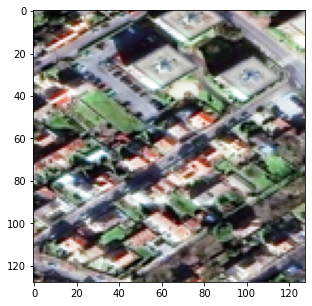

In [123]:

plt.figure(figsize=(5, 5))
img = Image.open("final_images_small\\" + X_paths[9009].split("\\")[-1].replace(".npy", '') + '.png')
array = np.array(img).astype(np.uint8)
plt.imshow(array)

SN3_roads_train_AOI_3_Paris_PS-RGB_img404_a.npy


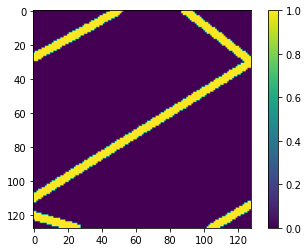

In [122]:
print(X_paths[9009].split("\\")[-1])
mask = np.load("final_masks_small\\" + X_paths[9009].split("\\")[-1])
plt.imshow(mask[:, :, 0])
plt.colorbar()

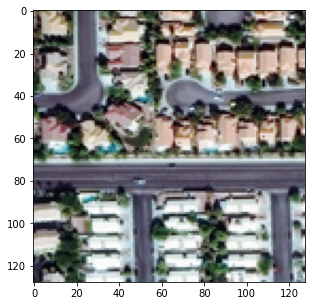

In [115]:

plt.figure(figsize=(5, 5))
img = Image.open("final_images_small\AOI_2_Vegas_img1073.png")
array = np.array(img).astype(np.uint8)
plt.imshow(array)

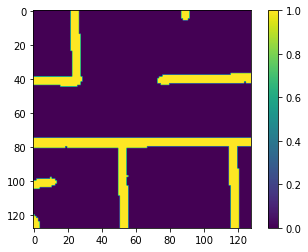

In [116]:
mask = np.load("final_masks_small\\AOI_2_Vegas_img1073.npy")
plt.imshow(mask[:, :, 0])
plt.colorbar()

In [117]:
for k in range(1000):
    try:
        mask = np.load("final_masks_small\\" + X_paths[k].split("\\")[-1])
        if np.sum(mask[:, :, 0]) > 0:
            print(k)
    except:
        continue

2
3
4
5
6
7
9
10
11
14
16
17
20
21
29
30
32
33
34
35
37
38
39
40
41
43
44
45
47
49
50
51
52
53
58
59
60
61
64
65
66
67
68
69
70
71
75
77
78
81
84
85
86
87
89
90
91
92
93
95
96
97
100
101
102
104
105
106
107
108
109
110
111
115
116
117
118
122
124
125
126
127
130
131
132
133
134
135
136
137
138
139
143
144
145
146
147
148
151
152
153
156
157
158
159
169
171
172
175
176
177
180
184
185
188
189
190
191
192
194
196
197
198
199
200
208
210
214
215
219
222
224
225
226
227
228
229
232
234
235
236
237
238
239
240
245
246
247
250
251
252
254
255
259
261
267
270
272
275
276
281
282
283
286
288
289
290
291
292
294
295
298
300
301
303
304
305
306
309
310
311
312
313
314
315
316
318
319
320
321
322
324
325
326
327
328
329
330
332
333
334
335
336
338
339
342
343
346
348
349
350
351
353
354
356
357
358
359
360
361
362
363
365
366
367
368
371
372
373
374
375
376
377
378
383
384
385
386
390
391
395
398
400
401
403
404
405
406
407
410
411
412
414
416
417
420
421
422
423
424
434
435
436
440
442
443
446
4

In [10]:
print(X_paths[k])

NameError: name 'k' is not defined